# Understanding PCA and The Curse Of Dimensionality

    A common topic that most beginners,struggle to understand is PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [2]:
data = pd.read_csv('../input/graduate-admissions/Admission_Predict.csv',index_col='Serial No.')

In [3]:
data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
6,330,115,5,4.5,3.0,9.34,1,0.90
7,321,109,3,3.0,4.0,8.20,1,0.75
8,308,101,2,3.0,4.0,7.90,0,0.68
9,302,102,1,2.0,1.5,8.00,0,0.50


In [4]:
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
y = data['Chance of Admit ']
X = data.drop('Chance of Admit ',axis=1)

In [7]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0


In [9]:
pca = PCA(n_components =2)
pca.fit(X)
X_PCA = pca.transform(X)

In [13]:
X_PCA = pd.DataFrame(X_PCA,columns=['PC1','PC2'])

In [14]:
X_PCA

,PC1,PC2
0,-22.874437,0.842160
1,-6.437340,-3.351222
2,2.221243,-2.744568
3,-5.744984,0.000912
4,4.594122,-2.912718
...,...,...
395,-7.597382,-0.819780
396,-7.190055,-3.967099
397,-15.749376,2.146158
398,6.186817,-1.799805


Text(0, 0.5, 'PC2')

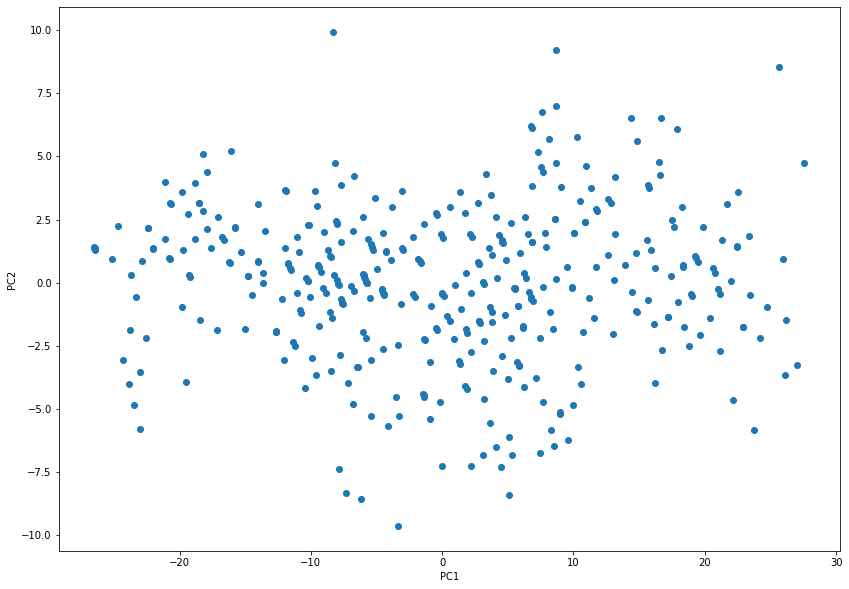

In [18]:
plt.figure(figsize=(14,10))
plt.scatter(X_PCA['PC1'],X_PCA['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [23]:
PCA_max = np.argmax(X_PCA['PC1'])
PCA_min = np.argmin(X_PCA['PC1'])

print(PCA_max)
print(PCA_min)

377
202


In [25]:
X.iloc[377,:]

GRE Score            290.00
TOEFL Score          100.00
University Rating      1.00
SOP                    1.50
LOR                    2.00
CGPA                   7.56
Research               0.00
Name: 378, dtype: float64

In [24]:
X.iloc[202,:]

GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    4.50
LOR                    4.50
CGPA                   9.91
Research               1.00
Name: 203, dtype: float64

In [26]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X) 

In [28]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,shuffle=True)

In [30]:
print(X_train.shape)

(320, 7)


In [31]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
model.score(X_test,y_test)

0.7743213721412006

In [33]:
pred = model.predict(X_test)

In [34]:
pred

array([0.7665657 , 0.67269125, 0.77837403, 0.6999731 , 0.61498604,
       0.96597874, 0.67049528, 0.65927696, 0.64820668, 0.69902655,
       0.5837589 , 0.79056959, 0.64038972, 0.92176293, 0.66311386,
       0.9378283 , 0.96729462, 0.64201667, 0.63448879, 0.78700495,
       0.93946102, 0.73238981, 1.00115141, 0.76627532, 0.64636253,
       0.84776413, 0.49111669, 0.5511647 , 0.72102572, 0.95582631,
       0.80949236, 0.55498123, 0.66037618, 0.79176381, 0.90005298,
       0.82805228, 0.89625382, 0.73460219, 0.92858727, 0.83863399,
       0.68712759, 0.82154574, 0.94278862, 0.65700975, 0.73444912,
       0.79914113, 0.90570773, 0.7751114 , 0.65241655, 0.47679136,
       0.85678465, 0.77310468, 0.72882381, 0.9633608 , 0.87187893,
       0.77913188, 0.80494738, 0.66869701, 0.73668642, 0.53629561,
       0.64658749, 0.71371998, 0.67878801, 0.92275116, 0.84934548,
       0.65123513, 0.78310623, 0.69847617, 0.84076995, 0.82250065,
       0.60876129, 0.68400802, 0.77547501, 0.72000909, 0.84008

Text(0, 0.5, 'True Value')

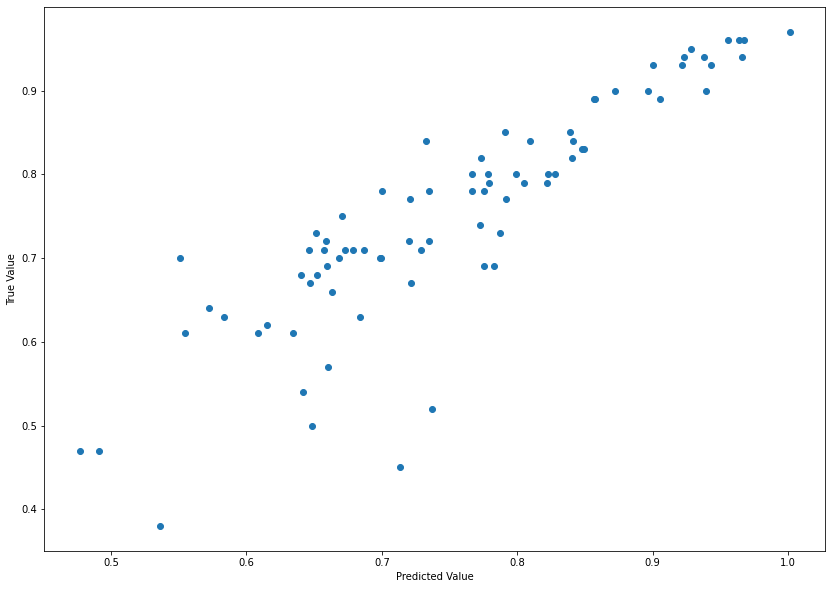

In [35]:
plt.figure(figsize=(14,10))
plt.plot(pred,y_test,'o')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')